<a href="https://colab.research.google.com/github/kSahatova/ITMO_MLTech/blob/main/MLTechnologiesLab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task#1**                         
1. Train 4 different classifiers using sklearn library to predict "Activity" (biological response of the molecule) field from the "bioresponse.csv" dataset:
  - small decision tree;
  - deep decision tree;
  - random forest on small trees;
  - random forest on deep trees;

2. Calculate the following metrics to check the quality of your models:
  - precision;
  - recall;
  - accuracy;
  - F1-score;
  - log-loss;

3. Plot precision-recall and ROC curves for your models.


4. Train a classifier who avoids Type II (False Negative) errors and calculate metrics  from p.2 for it.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.colors import ListedColormap
from sklearn import  datasets, metrics, tree 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, accuracy_score, f1_score 
from sklearn.metrics import precision_score,  recall_score, log_loss, roc_curve 

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from google.colab import drive
drive.mount('/content/drive/') 

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
data = pd.read_csv('/content/drive/MyDrive/bioresponse.csv')

In [ ]:
features = data.iloc[:,1:]
labels = data.iloc[:, 0]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=3)

In [72]:
# Design of function to show metrics of a classifier
def show_metrics(classifier, label, pred, pred_prob):

  fig, ax = plt.subplots(1, 2, figsize=(10, 5))

  print(f'{label}:\n',
  'precision = {p:.3f}; recall = {r:.3f}; accuracy = {a:.3f};\
  F1-score = {f:.3f}; log-loss = {l:.3f}\n'.format(
  p=precision_score(y_test, pred), r=recall_score(y_test, pred),
  a=accuracy_score(y_test, pred), f=f1_score(y_test, pred),
  l=log_loss(y_test, pred_prob)))
  
  prec, rec, thresh = precision_recall_curve(y_test, pred_prob)
  fpr, tpr, treshs = roc_curve(y_test, pred_prob)

  
  ax[0].plot(thresh, prec[:-1], label="precision")
  ax[0].plot(thresh, rec[:-1], label="recall")
  ax[0].set(xlabel="threshold")
  ax[0].set_title(label)
  ax[0].legend()    
  
  ax[1].plot(fpr,tpr, label=label)
  ax[1].set(xlabel="fpr", ylabel="tpr")
  ax[1].set_title('ROC curve')
  ax[1].legend() 


**Construction of the classifiers**

***1. Small Decision Tree***

In [8]:
# Small Decision Tree with the depth equal to 5 nodes
sdt = DecisionTreeClassifier(max_depth=5, random_state=1)

In [9]:
# Classifier's training
sdt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

Small Decision Tree:
 precision = 0.777; recall = 0.802; accuracy = 0.766;  F1-score = 0.789; log-loss = 0.832



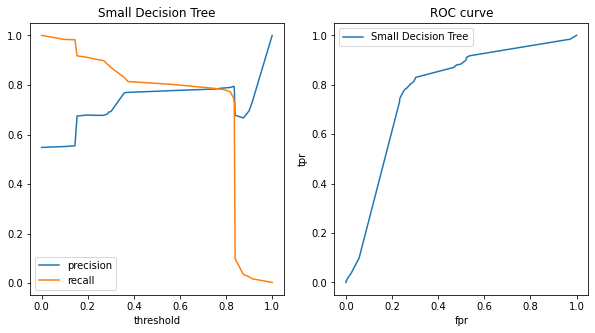

In [74]:
y_pred = sdt.predict(X_test)
y_pred_prob = sdt.predict_proba(X_test)[:,1]
show_metrics(sdt, 'Small Decision Tree', y_pred, y_pred_prob)

***2. Deep Decision Tree***

In [11]:
# Deep Decision Tree with the depth equal to 15 nodes
ddt = DecisionTreeClassifier(max_depth=15, random_state=1)

In [12]:
# Classifier's training
ddt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

Deep Decision Tree:
 precision = 0.757; recall = 0.783; accuracy = 0.743;  F1-score = 0.770; log-loss = 6.624



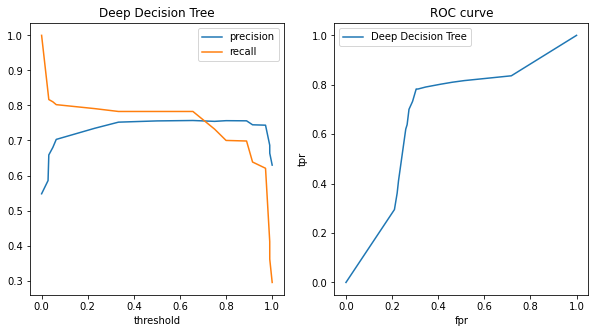

In [76]:
y_pred = ddt.predict(X_test)
y_pred_prob = ddt.predict_proba(X_test)[:,1]
show_metrics(ddt, 'Deep Decision Tree', y_pred, y_pred_prob)

***3. Random Forest of Small Decision Trees***

In [79]:
# Random forest of 50 Small Decision Trees with the depth equal to 5 nodes
random_forest_sdt = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=456)

In [80]:
# Classifier's training
random_forest_sdt.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=456,
                       verbose=0, warm_start=False)

Random forest of Small Decision Trees:
 precision = 0.758; recall = 0.768; accuracy = 0.739;  F1-score = 0.763; log-loss = 0.552



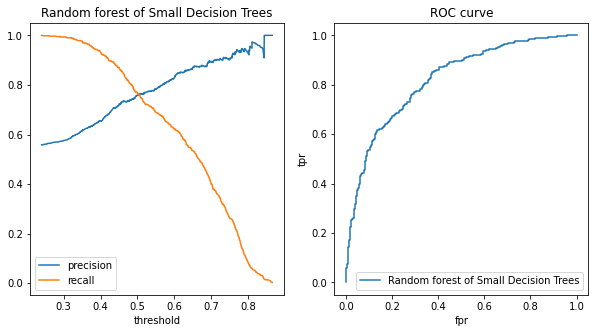

In [81]:
y_pred = random_forest_sdt.predict(X_test)
y_pred_prob = random_forest_sdt.predict_proba(X_test)[:,1]
show_metrics(random_forest_sdt, 'Random forest of Small Decision Trees', y_pred, y_pred_prob)

***4. Random Forest of Deep Decision Trees***

In [83]:
# Random forest of 50 Deep Decision Trees with the depth equal to 15 nodes
random_forest_ddt = RandomForestClassifier(n_estimators=50, max_depth=15, random_state=654)

In [84]:
# Classifier's training
random_forest_ddt.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=654,
                       verbose=0, warm_start=False)

Random forest of Deep Decision Trees:
 precision = 0.794; recall = 0.854; accuracy = 0.798;  F1-score = 0.823; log-loss = 0.456



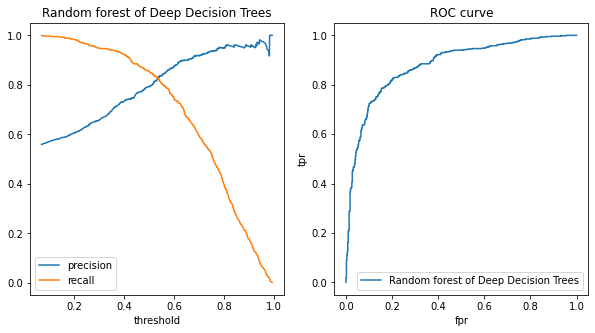

In [85]:
y_pred = random_forest_ddt.predict(X_test)
y_pred_prob = random_forest_ddt.predict_proba(X_test)[:,1]
show_metrics(random_forest_ddt, 'Random forest of Deep Decision Trees', y_pred, y_pred_prob)

**A classifier that avoids False Negatives**

In [55]:
ddt1 = DecisionTreeClassifier(max_depth=10, class_weight={0: 1, 1: 3}, random_state=1)

In [56]:
# Classifier's training
ddt1.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 1, 1: 3},
                       criterion='gini', max_depth=10, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=1, splitter='best')

In [57]:
y_pred = [ddt1.predict(X_test)]
y_pred_prob = [ddt1.predict_proba(X_test)[:,1]]

In [ ]:
show_metrics(classifier, labels, y_pred, y_pred_prob)